In [1]:
from speed_from_accelerometer import *
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [6]:
cols = [
    'device',
    'truth',
    'unfiltered',
    'loess',
    'butterworth',
]
rows = []

for data, device in datasets():
    stats = gather_approximations(data)
    approx = stats['approximations']
    truth = stats['truth']
    
    baseline = approx['unfiltered'][1] 
    loess = approx['loess'][1]
    butterworth = approx['butterworth'][1]
    
    row = [device, truth, baseline, loess, butterworth]
    rows += [row]
    
results = pd.DataFrame(rows, columns=cols).set_index('device')
results

/home/kasra/318/318-project/find_cutoff.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfl['dif'] = (dfl['filtered'] - middle).abs()
/home/kasra/318/318-project/find_cutoff.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfr['dif'] = (dfr['filtered'] - middle).abs()
/home/kasra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: generator 'datasets' raised StopIteration
  # Remove the CWD from sys.path while we load stuff.


truth  unfiltered     loess  butterworth
device                                              
android  1.333333    1.789578  1.368884     1.724762
android  1.538462    1.708665  1.583033     1.668754
android  1.587302    1.784927  1.562769     1.772875
android  1.694915    1.934776  1.836123     1.914210
android  1.162791    0.948128  0.903910     0.951384
iphone   1.408451    1.038145  1.037461     1.028663
iphone   1.470588    0.998456  0.930110     0.999045

In [7]:
#results.apply(lambda x: abs(x - results['truth'])).plot(kind='bar')
errors = results.apply(lambda r: abs(results['truth'] - r)) 

android_results = errors[errors.index == 'android'].reset_index().drop(['device', 'truth'], 1)
android_results.plot(kind='barh')

ax = plt.gca()
ax.set_ylabel('Data sets')
ax.set_xlabel('Error')
ax.set_title("Error in Speed Approximation On Android Datasets")

plt.show()

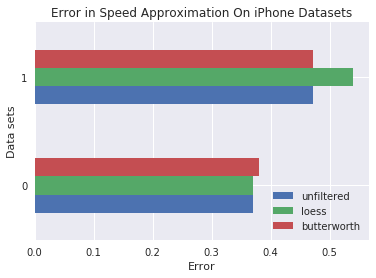

In [8]:
iphone_results = errors[errors.index == 'iphone'].reset_index().drop(['device', 'truth'], 1)

iphone_results.plot(kind='barh')

ax = plt.gca()
ax.set_ylabel('Data sets')
ax.set_xlabel('Error')
ax.set_title("Error in Speed Approximation On iPhone Datasets")
plt.show()